### 머신러닝 기반 카드 이탈고객 예측
     1. 개요
     2. 데이터 수집
     3. 데이터 확인 및 시각화
     4. 데이터 전처리 및 피쳐 엔지니어링
         (1) 타겟 데이터 전처리
         (2) 피처 데이터 전처리 
         (3) 피처 데이터 변수 선택
         (4) 피처 엔지니어링
     5. 모델링
     6. 테스팅

## 1. 개요

- 카드 회사들은 고객 유치를 위해 많은 프로모션을 진행
- 새로운 고객을 유치하는 것보다 기존 고객을 유지하는 것이 경제적 효과큼
- 기존 고객의 이탈 여부를 사전에 예측 가능한 모델 구축

## 2. 데이터 수집

- 데이터 출처 (링크 [kaggle](https://www.kaggle.com/sakshigoyal7/credit-card-customers))
- 은행의 고객 중에서 신용카드 고객 이탈자에 대한 자료
- 이탈 고객의 16.07%만 자료를 가지고 있어서 한계가 있는 데이터임
- 연령, 급여, 결혼 여부, 신용카드 한도, 신용카드 등급 등 여러 정보를 가지고 이탈 고객 분석

## 3. 데이터 확인 및 시각화

**모듈 임포트**

In [654]:
import pandas as pd # 데이터 핸들링 
import numpy as np 
import matplotlib.pyplot as plt # 데이터 시각화 
%matplotlib inline
import seaborn as sns # 데이터 시각화(고급분석)
import warnings
warnings.filterwarnings("ignore")

In [655]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all" 

**데이터 불러오기**
- 데이터명 : **df**
- 경로 :  **"./data/BankChurners.csv"**.

In [656]:
df = pd.read_csv("./data/BankChurners.csv")
## 불필요한 열 2개 제거
df = df.iloc[:,:-2]

In [657]:
df.keys()

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

####  데이터 정보
- ~'CLIENTNUM' : 고객 식별 번호~
- 'Attrition_Flag' : 신용 카드 이탈 여부 **``Target 값``**
    - Existing Customer : 잔류
    - Attrited Customer : 이탈
- 'Customer_Age' : 고객 나이
- 'Gender' : 성별
- 'Dependent_count' : 부양 가족 수
- 'Education_Level' : 학력 수준
- 'Marital_Status' : 결혼 여부
- 'Income_Category' : 연 소득 구간
- 'Card_Category' : 카드 등급
- 'Months_on_book' : 카드 할부 기간
- 'Total_Relationship_Count' : 가입 상품 수
- 'Months_Inactive_12_mon' : 1년 동안 카드 결재 내역이 없는 비활성 기간(개월)
- 'Contacts_Count_12_mon' : 연락 빈도
- 'Credit_Limit' : 신용 한도
- 'Total_Revolving_Bal' : 할부 잔액
- ~'Avg_Open_To_Buy' : 평균 실 사용 가능 금액 :  'Credit_Limit' -  'Total_Revolving_Bal'~
- ~'Total_Amt_Chng_Q4_Q1'~ : 결제 대금 기준 1분기 대비 4분기 (비율) 
- ~'Total_Trans_Amt'~ : 실제 사용 총액
- 'Total_Trans_Ct' : 실제 사용 횟수
- 'Total_Ct_Chng_Q4_Q1' : 1분기 대비 4분기 결제 대금 횟수 비율
- ~'Avg_Utilization_Ratio' : 'Total_Revolving_Bal'/ 'Credit_Limit' (할부 비율)~

#### 변수 정보

| 변수명                   | 변수형태 | 구분     |
| :------------------------: | :--------: | :--------: |
| CLIENTNUM                | INT      | 피처변수 |
| Customer_Age             | INT      | 피처변수 |
| Gender                   | Object   | 피처변수 |
| Dependent_count          | INT      | 피처변수 |
| Education_Level          | Object   | 피처변수 |
| Marital_Status           | Object   | 피처변수 |
| Income_Category          | Object   | 피처변수 |
| Card_Category            | Object   | 피처변수 |
| Months_on_book           | INT      | 피처변수 |
| Total_Relationship_Count | INT      | 피처변수 |
| Months_Inactive_12_mon   | INT      | 피처변수 |
| Contacts_Count_12_mon    | INT      | 피처변수 |
| Credit_Limit             | INT      | 피처변수 |
| Total_Revolving_Bal      | INT      | 피처변수 |
| Avg_Open_To_Buy          | INT      | 피처변수 |
| Total_Amt_Chng_Q4_Q1     | INT      | 피처변수 |
| Total_Trans_Amt          | INT      | 피처변수 |
| Total_Trans_Ct           | INT      | 피처변수 |
| Total_Ct_Chng_Q4_Q1      | INT      | 피처변수 |
| Avg_Utilization_Ratio    | INT      | 피처변수 |

**데이터 확인**

In [658]:
## 데이터 유형 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [659]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [660]:
# 통계치 정보 확인
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


**시각화 ( sns.pairplot(df) )** 
- 사용할 데이터의 상관관계를 파악하기 위해 시각화
- 모든 칼럼에 대한 시각화 

In [661]:
### 실행시간으로 인한 주석 처리
# sns.pairplot(df)

**결측치 확인**
- isnull().sum() 코드에서는 결측치가 존재하지 않는 것을 확인
- 각각의 피처를 분석해서 결측치 존재 여부 확인 필요

In [662]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

### 4. 데이터 전처리 및 피쳐 엔지니어링

#### 4 - (1) 타겟 데이터 전처리
- 관측 대상 : **``"Attrited Customer"``** 1로 설정 (카드 탈퇴)
- 비관측 대상 : **``"Existing Cumstomer"``** 0으로 설정 (카드 유지)

In [663]:
df["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

<AxesSubplot:>

(array([0, 1]),
 [Text(0, 0, 'Existing Customer'), Text(1, 0, 'Attrited Customer')])

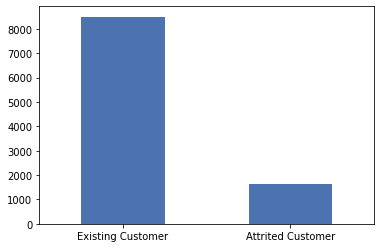

In [664]:
# 타겟 데이터의 분포를 바 플롯을 이용하여 시각화
df["Attrition_Flag"].value_counts().plot(kind = 'bar') 
plt.xticks(rotation=360)

**Existing Cumstomer(잔존)과 Attrited Customer(이탈)의 비율에 차이 존재**

([<matplotlib.patches.Wedge at 0x28defa610>,
 [Text(-0.9628371444551311, 0.5319254019667504, 'Existing Customer'),
  Text(1.0503678211160241, -0.5802822075197344, 'Attrited Customer')],
 [Text(-0.525183896975526, 0.29014112834550015, '83.9%'),
  Text(0.6127145623176807, -0.33849795438651165, '16.1%')])

(-1.25, 1.25, -1.25, 1.25)

Text(0.5, 1.0, 'Attrition (비율)')

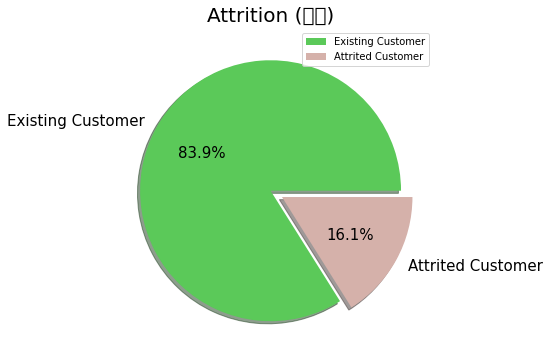

In [665]:
# 타겟 데이터의 분포를 파이 플롯을 이용하여 시각화
labels = ['Existing Customer', 'Attrited Customer']
size = df['Attrition_Flag'].value_counts()
colors = ['#5bc959','#d5b1aa' ]
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.1f%%", shadow = True, textprops = {'fontsize':15})
plt.axis('off')
plt.title('Attrition (비율)', fontsize = 20)
plt.legend()
plt.show()

**레이블 인코딩**
- "Existing Cumstomer" : 0 (카드 잔존)
- "Attrited Customer" : 1 (카드 탈퇴)


**주의하여 관측해아할 것이**
``"탈퇴"여부이기 때문에 탈퇴를 1, 잔존을 0으로 하여 인코딩``

In [666]:
df["Attrition_Flag"].replace({"Existing Customer":0,
                            "Attrited Customer":1,
                            },inplace=True)

<AxesSubplot:>

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

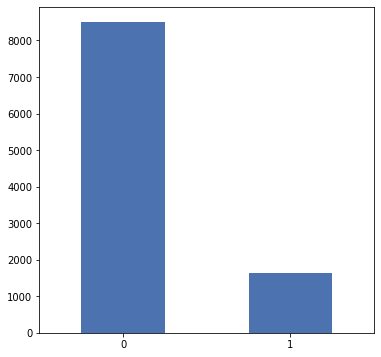

In [667]:
df["Attrition_Flag"].value_counts().plot(kind = 'bar')  
plt.xticks(rotation=360)

In [668]:
df["Attrition_Flag"].value_counts() # 전처리 확인

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [669]:
Existing = df[df["Attrition_Flag"]==0]
Attrited = df[df["Attrition_Flag"]==1]

Existing_ratio = len(Existing)/len(Existing+Attrited) 
Attrited_ratio = len(Attrited)/len(Existing+Attrited) 

print("카드를 유지한 고객은 {:.2f} 이고, 탈퇴 고객은 {:.2f}이므로, 카드를 유지한 고객이 {:.0f}배 많다"
      .format(Existing_ratio,Attrited_ratio,Existing_ratio/Attrited_ratio))

카드를 유지한 고객은 0.84 이고, 탈퇴 고객은 0.16이므로, 카드를 유지한 고객이 5배 많다


#### 중간 정리
- "Existing Cumstomer" 84%, "Attrited Customer" 16% 데이터 불균형이 필요
- 테스트를 통해 업샘플링(오버샘플링)이나 다운샘플링(언더샘플링)이 필요한지 파악

#### 진행 과정
- 업샘플링은 전처리 과정이 아니라, 모델을 돌리면서 성능을 높이기 위한 작업 과정
- 업샘플링 전후의 성능을 비교 후 업샘플링 여부 선정

#### 4 - (2) 피처 데이터 전처리
- 피처 간의 상관성이 높지 않을 경우 삭제하지 않고 모델 학습에 사용
- 피처의 성질에 따라 Labels(명목척도) , Orders(서열척도), Numerics(수치형) 변수로 구분하여 전처리를 진행

In [670]:
Labels = ['Gender','Marital_Status'] # 명목 척도
Orders = ['Education_Level','Income_Category','Card_Category'] # 서열 척도 (등간 척도)
Numerics = ['Customer_Age','Dependent_count','Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'] # 수치형 변수

**Customer_Age(나이)**

<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

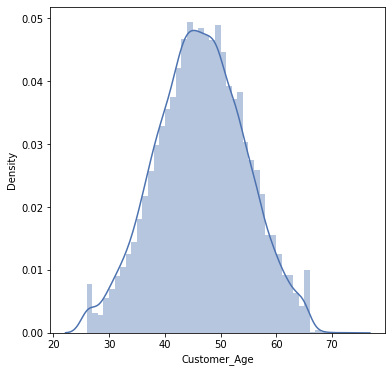

In [671]:
sns.distplot(df["Customer_Age"])

**Customer_Age (나이) 칼럼은 거의 완벽한 정규분포를 따른다는 것을 확인**

**이상치 확인(시각화)**

<AxesSubplot:>

<AxesSubplot:xlabel='Customer_Age'>

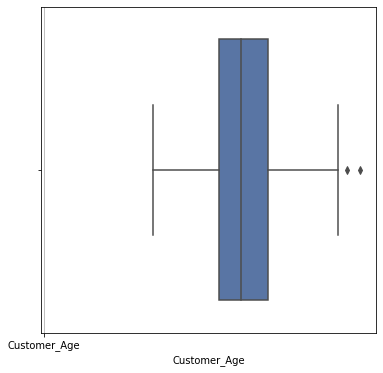

In [672]:
df[["Customer_Age"]].boxplot()
sns.boxplot(df["Customer_Age"])

**이상치 확인 (수치 확인)**
    여기서 박스플롯에서 범위 밖으로 넘어가는 2개의 plot이 보이는데, 이 값이 이 범위를 벗어난다고 하더라도, 이 수치가 데이터 분석에 큰 영향을 끼치지 않으면 ( 말이 안되는 값이거나 범위에서 너무 벗어난 값 -예를 들면 우리나라 연봉을 조사하는데 이재용 삼성 부회장의 연봉은 제외를 해야 한다. ) 그 값은 이상치로 취급하지 않는다.

In [673]:
df["Customer_Age"].max()

73

**나이 칼럼에서 가장 큰 수치는 73인데 이 수치는 충분히 가능한 값이다.만약 이 값이 200이다 라고 한다면 이 이상치는 삭제나 대체가 필요하지만, 73세는 나이로서 충분히 가능한 수치이므로 전처리 하지않는다.(이상치 취급하지 않음)**

In [674]:
# 이상치 확인 (참고 사항)
q1 = np.quantile(df["Customer_Age"],0.25)  
q3 = np.quantile(df["Customer_Age"],0.75) 
iqr = q3-q1
q3+iqr*1.5
q1-iqr*1.5

cond1 = q3+iqr*1.5<df["Customer_Age"]
cond2 = df["Customer_Age"]<q1-iqr*1.5

outlier_index = df[cond1 | cond2].index

68.5

24.5

**Gender(성별)**

<AxesSubplot:>

(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

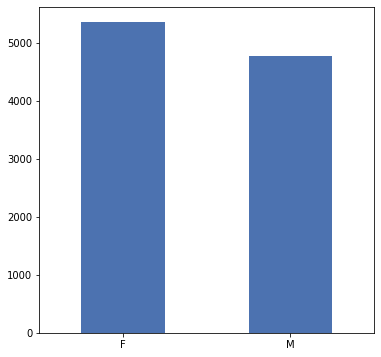

In [675]:
# 성별의 분포를 bar 그래프를 이용하여 시각화
df['Gender'].value_counts().plot(kind = 'bar')
plt.xticks(rotation=360)

In [676]:
# 성별 이탈고객 수
gend_df = pd.DataFrame(df.loc[:,['Gender','Attrition_Flag']].value_counts())
gend_df

,,0
Gender,Attrition_Flag,
F,0,4428
M,0,4072
F,1,930
M,1,697


In [677]:
# 성별 평균 나이
df.groupby('Gender')['Customer_Age'].agg(**{'Customer_Age':'mean'}).reset_index()

,Gender,Customer_Age
0,F,46.456887
1,M,46.178863


In [678]:
# 성별 나이 분포
df[['Gender','Customer_Age']].value_counts()

Gender  Customer_Age
F       44              277
        45              272
        49              263
        47              258
        48              249
                       ... 
        66                2
M       67                2
        68                2
        70                1
        73                1
Length: 86, dtype: int64

In [679]:
# 성별 라벨링 F : 0, M : 1
df["Gender"].replace({"F":1, "M":0},inplace=True)

In [680]:
df["Gender"].value_counts()
# Female 아니면 Male로 이진분류가 잘 되어있다.
# Label Encoding

1    5358
0    4769
Name: Gender, dtype: int64

In [681]:
df["Gender"] # 라벨인코딩 된 것을 확인 할 수 있다.

0        0
1        1
2        0
3        1
4        0
        ..
10122    0
10123    0
10124    1
10125    0
10126    1
Name: Gender, Length: 10127, dtype: int64

In [682]:
# 라벨링 작업 정상 여부 확인
df["Gender"].value_counts()

1    5358
0    4769
Name: Gender, dtype: int64

In [683]:
# 부양 가족 수 값
df['Dependent_count'].value_counts().index

Int64Index([3, 2, 1, 4, 0, 5], dtype='int64')

Text(0.5, 1.0, 'Dependent_count')

<AxesSubplot:title={'center':'Dependent_count'}, xlabel='Dependent_count', ylabel='count'>

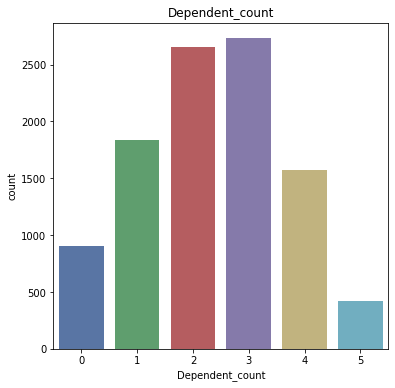

In [684]:
# 부양 가족 수 분포
plt.title('Dependent_count')
sns.countplot(df["Dependent_count"])

**연령대 별 부양 가족수 파악을 위한 작업**

In [685]:
bins = list(range(20,81,10))
bins

[20, 30, 40, 50, 60, 70, 80]

In [686]:
labels = [str(i) + '대' for i in bins]
labels

['20대', '30대', '40대', '50대', '60대', '70대', '80대']

In [687]:
# 나이대 라벨 추가
df["age_bin"] = pd.cut(df["Customer_Age"], bins = bins, right = False, labels=labels[:-1])
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,age_bin
0,768805383,0,45,0,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,40대
1,818770008,0,49,1,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40대
2,713982108,0,51,0,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,50대
3,769911858,0,40,1,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40대
4,709106358,0,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,40대


In [688]:
df[["Customer_Age","age_bin"]]

,Customer_Age,age_bin
0,45,40대
1,49,40대
2,51,50대
3,40,40대
4,40,40대
...,...,...
10122,50,50대
10123,41,40대
10124,44,40대
10125,30,30대


In [689]:
# 연령대별 평균 부양가족 수
dependent = df.groupby('age_bin')['Dependent_count'].agg(**{'dependent':'mean'}).reset_index()
dependent

,age_bin,dependent
0,20대,0.430769
1,30대,2.002173
2,40대,2.970401
3,50대,2.055037
4,60대,0.530189
5,70대,0.000000


<AxesSubplot:xlabel='age_bin', ylabel='dependent'>

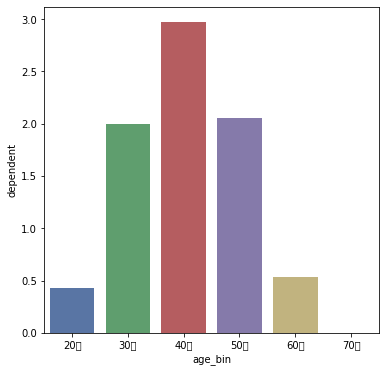

In [690]:
# 연령대별 평균 부양 가족 수
sns.barplot(x='age_bin',y='dependent',data=dependent)

In [691]:
# 성별 평균 부양가족 수
gender = df.groupby('Gender')['Dependent_count'].agg(**{'dependent':'mean'}).reset_index()
gender

,Gender,dependent
0,0,2.352485
1,1,2.340612


In [692]:
# 연령대별 이탈고객
age_churn = pd.DataFrame(df.loc[:,['age_bin','Attrition_Flag']].value_counts().sort_index(ascending=True))
age_churn

0
age_bin Attrition_Flag      
20대     0                178
        1                 17
30대     0               1580
        1                261
40대     0               3789
        1                772
50대     0               2492
        1                506
60대     0                459
        1                 71
70대     0                  2

### 4 (2) 범주형 피처 인코딩

**타겟변수(탈퇴인지, 잔존인지)에 따른 분포를 바 그래프로 보여주는 함수**

In [693]:
def bar_chart(feature):
    stay = df[df['Attrition_Flag']==0][feature].value_counts()
    leave = df[df['Attrition_Flag']==1][feature].value_counts()
    temp = pd.DataFrame([stay,leave])
    temp.index = ['Existing Customer','Attrited Customer']
    
    temp.plot(kind='bar',stacked=True, figsize=(10,5))
    plt.xticks(rotation=0)

**Card_Category(카드 등급) 고객 이탈자**

In [694]:
# 카드 등급별 이탈자
Card_Category = df.groupby(['Card_Category', 'Attrition_Flag'])['Attrition_Flag'].count()
Card_Category

Card_Category  Attrition_Flag
Blue           0                 7917
               1                 1519
Gold           0                   95
               1                   21
Platinum       0                   15
               1                    5
Silver         0                  473
               1                   82
Name: Attrition_Flag, dtype: int64

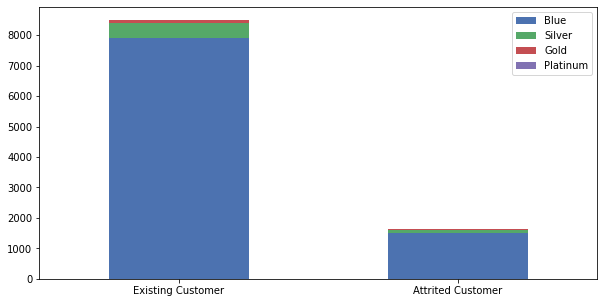

In [695]:
bar_chart('Card_Category') 

In [696]:
## Unknow 여부 확인 (결측치)
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

**Education_Level 수준에 따른 고객 이탈자**

#### Education_Level 데이터 정보
- unknown 알수 없음
- uneducated 중졸이하
- high school 고졸
- colleage 학사
- graduate / post-graduate 석사
- Docotrate 박사

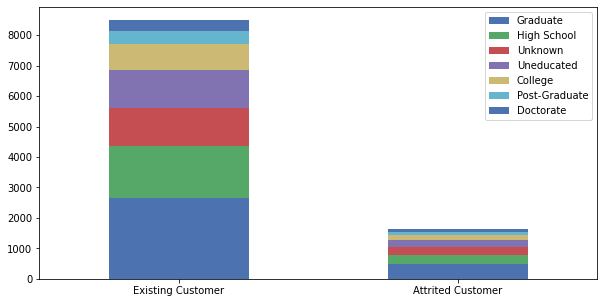

In [697]:
bar_chart('Education_Level')

In [698]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [699]:
Card_Category = df.groupby(['Education_Level', 'Attrition_Flag'])['Attrition_Flag'].count()
Card_Category

Education_Level  Attrition_Flag
College          0                  859
                 1                  154
Doctorate        0                  356
                 1                   95
Graduate         0                 2641
                 1                  487
High School      0                 1707
                 1                  306
Post-Graduate    0                  424
                 1                   92
Uneducated       0                 1250
                 1                  237
Unknown          0                 1263
                 1                  256
Name: Attrition_Flag, dtype: int64

In [700]:
# 학력 수준에 따른 임금 파악
# 임금에 따라 학력 수준을 처리할 수 있는지 파악
df.groupby(['Education_Level','Income_Category'])['Attrition_Flag'].count()

Education_Level  Income_Category
College          $120K +              70
                 $40K - $60K         183
                 $60K - $80K         132
                 $80K - $120K        175
                 Less than $40K      345
                 Unknown             108
Doctorate        $120K +              37
                 $40K - $60K          70
                 $60K - $80K          59
                 $80K - $120K         57
                 Less than $40K      158
                 Unknown              70
Graduate         $120K +             204
                 $40K - $60K         553
                 $60K - $80K         422
                 $80K - $120K        478
                 Less than $40K     1139
                 Unknown             332
High School      $120K +             147
                 $40K - $60K         355
                 $60K - $80K         307
                 $80K - $120K        308
                 Less than $40K      671
                 Unknown

**Marital_Status 수준에 따른 고객 이탈자**

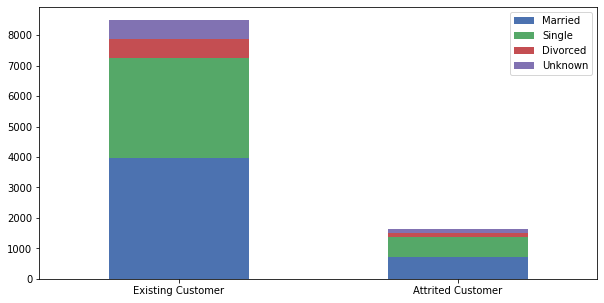

In [701]:
bar_chart('Marital_Status')

In [702]:
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

**Income_Category 수준에 따른 고객 이탈자**

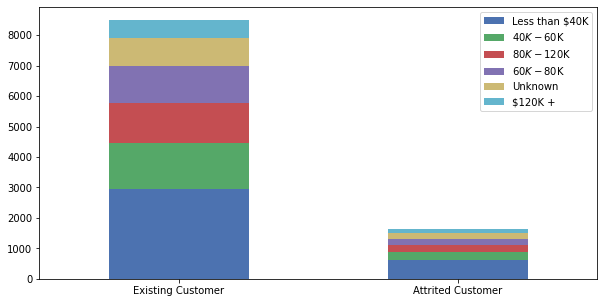

In [703]:
bar_chart('Income_Category') 

In [704]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

### **Education_Level, Marital_Status, Income_Category에서 "Unknown"이라는 결측치 존재**
- Education_Level 1519개
- Marital_Status 749개
- Income_Category 1112개

In [705]:
df["Education_Level"].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [706]:
df["Marital_Status"].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [707]:
df["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [708]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  int64   
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  int64   
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  object  
 6   Marital_Status            10127 non-null  object  
 7   Income_Category           10127 non-null  object  
 8   Card_Category             10127 non-null  object  
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

#####  **"Unknown"**에 대한 처리 방법은
    1. "Unknown"도 하나의 category로 해석
    2. "Unknown"값이 있는 행을 삭제하거나, 칼럼 자체(피처)를 삭제
    3. 모델링을 활용하여 대체
    4. 최빈값으로 대체
#### 여러 가지 시도후 최적화된 값 구하기

**결측치로 처리 되지 않았던 Unknown을 np.nan으로 결측치로 처리 후, 대표값(최빈값)으로 결측치를 대체**

In [709]:
# Card_Category(카드 등급) 은 4개의 등급(Blue, Silver, Gold, Platinum)으로 나뉘어진 범주형 변수이다. 
# 라벨링 인코딩을 해주도록 한다.
df["Card_Category"].replace({"Blue":0,
                                 "Silver":1,
                                 "Gold":2,
                                 "Platinum":3,
                                 },inplace=True)

In [710]:
df["Education_Level"].replace({"Unknown": np.nan,
                                "Graduate":0,
                                "Post-Graduate":1,
                                "Uneducated":2,
                                "College":3,
                                "Doctorate":4,
                                "High School":5,
                                 },inplace=True)

In [711]:
df["Marital_Status"].replace({"Unknown": np.nan,
                                "Married":0,
                                "Single":1,
                                "Divorced":2,
                                 },inplace=True)

In [712]:
df["Income_Category"].replace({"Unknown": np.nan,
                                "Less than $40K":0,
                                "$40K - $60K":1,
                                "$60K - $80K":2,
                                "$80K - $120K":3,
                                "$120K +":4,
                                 },inplace=True)

In [713]:
# Unknown이 결측치(np.nan)로 대체 된것을 확인할 수 있다.
df.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
age_bin                        0
dtype: int64

In [714]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  int64   
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  int64   
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           8608 non-null   float64 
 6   Marital_Status            9378 non-null   float64 
 7   Income_Category           9015 non-null   float64 
 8   Card_Category             10127 non-null  int64   
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [715]:
# 대표값 이용 결측치 대체 모듈 
from sklearn.impute import SimpleImputer
# 각 데이터에 사용할 인스턴스 생성
SI_mode =SimpleImputer(strategy = 'most_frequent') # 대표값 중 최빈값으로 결측치를 대체해준다.
# 학습
SI_mode.fit(df)
df = pd.DataFrame(SI_mode.transform(df),
                            columns = df.columns)

SimpleImputer(strategy='most_frequent')

In [716]:
# 결측치가 대체를 확인할 수 있다.
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
age_bin                     0
dtype: int64

In [717]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CLIENTNUM                 10127 non-null  object
 1   Attrition_Flag            10127 non-null  object
 2   Customer_Age              10127 non-null  object
 3   Gender                    10127 non-null  object
 4   Dependent_count           10127 non-null  object
 5   Education_Level           10127 non-null  object
 6   Marital_Status            10127 non-null  object
 7   Income_Category           10127 non-null  object
 8   Card_Category             10127 non-null  object
 9   Months_on_book            10127 non-null  object
 10  Total_Relationship_Count  10127 non-null  object
 11  Months_Inactive_12_mon    10127 non-null  object
 12  Contacts_Count_12_mon     10127 non-null  object
 13  Credit_Limit              10127 non-null  object
 14  Total_Revolving_Bal   

In [718]:
#중간에 dtype이 모두 object로 바뀌어서 에러가 났다.

df[Numerics]=df[Numerics].astype("float")
df[Labels]=df[Labels].astype("int")
df[Orders]=df[Orders].astype("int")
df["Attrition_Flag"]=df["Attrition_Flag"].astype("int")

In [719]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  object 
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  float64
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  float64
 5   Education_Level           10127 non-null  int64  
 6   Marital_Status            10127 non-null  int64  
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  int64  
 9   Months_on_book            10127 non-null  float64
 10  Total_Relationship_Count  10127 non-null  float64
 11  Months_Inactive_12_mon    10127 non-null  float64
 12  Contacts_Count_12_mon     10127 non-null  float64
 13  Credit_Limit              10127 non-null  float64
 14  Total_

#### 4-(3) 상관관계가 높은 피처 제거

(<Figure size 1440x648 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

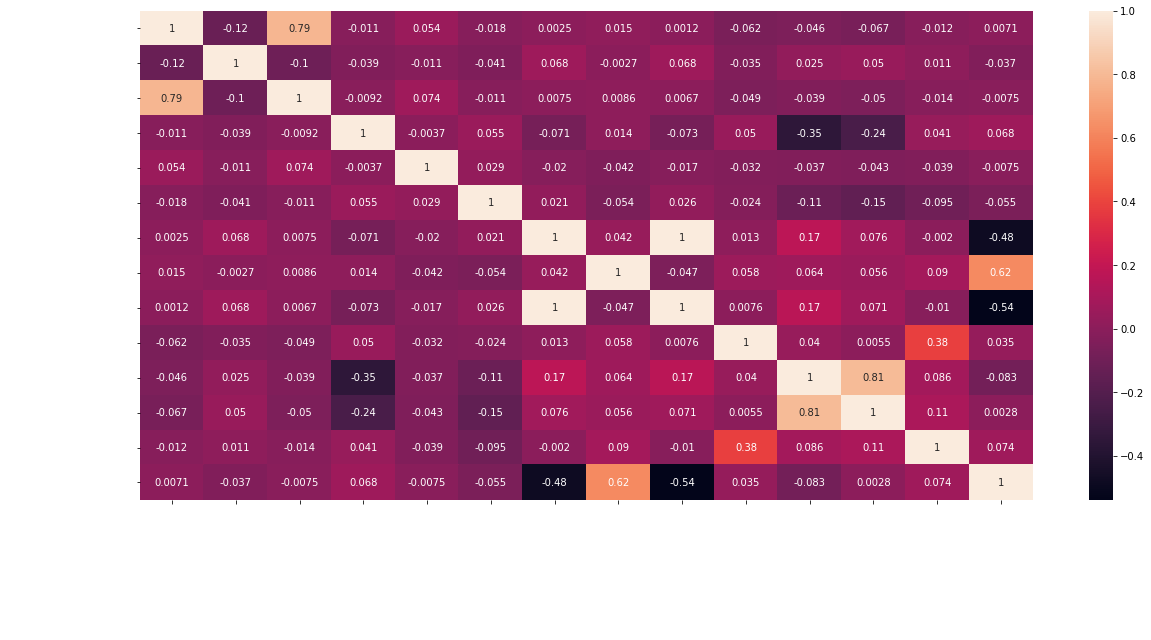

In [720]:
plt.subplots(figsize=(20,9))
plt.tick_params(axis='x',labelcolor='white')
plt.tick_params(axis='y',labelcolor='white')
sns.heatmap(df[Numerics].corr(),annot = True )

### 피처 간의 상관계수로 열 제거 판단

(1) **`Month_on_book`**과 **`Customer_Age`**의 상관계수는 0.79로 높지만, 삭제 X
- 각각의 피처 할부기간, 고객 나이를 의미
- 도메인 관점에서 분석하면 각각의 상관관계 적은 피처로 생각 가능해서 삭제하지 않음


(2) **`Credit_Limit`**와 **`Avg_Utilization_Ratio`**의 상관계수가 0.48로 높아서, 삭제
- 같은 변수에서 파생되어진 피처
- 둘중 하나의 변수만 나두고 나머지 하나는 삭제

**Attrition_Flag(범주형)과 수치형 피처 변수들의 상관관계를 파악** 
- 상관계수를 파악하기 위해 pointbiserialr 사용 

In [721]:
from scipy.stats import pointbiserialr

features = ['Avg_Open_To_Buy','Credit_Limit','Total_Revolving_Bal','Avg_Utilization_Ratio','Total_Trans_Amt','Total_Trans_Ct','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1'] 

print("Attrition_Flag를  기준으로 상관관계 분석")
print('---------------------------------------------------')
print('')

for feature in features:
    target_feature_corr, target_feature_pvalue = pointbiserialr(df['Attrition_Flag'], df[feature])
    print(feature,"와 Attrition_Flag의")
    print('상관관계 : {0:.4f}'.format(target_feature_corr))
    print('P-value : {0:.8f}'.format(target_feature_pvalue))
    print('---------------------------------------------------')
    print('')
   

Attrition_Flag를  기준으로 상관관계 분석
---------------------------------------------------

Avg_Open_To_Buy 와 Attrition_Flag의
상관관계 : -0.0003
P-value : 0.97711609
---------------------------------------------------

Credit_Limit 와 Attrition_Flag의
상관관계 : -0.0239
P-value : 0.01628536
---------------------------------------------------

Total_Revolving_Bal 와 Attrition_Flag의
상관관계 : -0.2631
P-value : 0.00000000
---------------------------------------------------

Avg_Utilization_Ratio 와 Attrition_Flag의
상관관계 : -0.1784
P-value : 0.00000000
---------------------------------------------------

Total_Trans_Amt 와 Attrition_Flag의
상관관계 : -0.1686
P-value : 0.00000000
---------------------------------------------------

Total_Trans_Ct 와 Attrition_Flag의
상관관계 : -0.3714
P-value : 0.00000000
---------------------------------------------------

Total_Amt_Chng_Q4_Q1 와 Attrition_Flag의
상관관계 : -0.1311
P-value : 0.00000000
---------------------------------------------------

Total_Ct_Chng_Q4_Q1 와 Attrition_Flag의
상관관계 : 

**상관관계가 낮은 열 제거**
- Avg_Open_To_Buy, Avg_Utilization_Ratio, Total_Trans_Amt, Total_Amt_Chng_Q4_Q1 삭제 ( 총 4개 삭제 )

In [722]:
df.drop(["CLIENTNUM", # 식별자 삭제
         "Avg_Open_To_Buy",
         "Avg_Utilization_Ratio",
         "Total_Trans_Amt",
         "age_bin",
         "Total_Amt_Chng_Q4_Q1"], axis=1,inplace=True)

#### 4 - (4) 수치형 변수 log변환 정규화 변환

In [723]:
# 수치형 변수 중에 drop시킨 변수를 제외한 나머지 변수들을 모은 리스트를 만든다.
Numerics = ['Customer_Age','Dependent_count','Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
        'Total_Ct_Chng_Q4_Q1', 
       'Total_Trans_Ct'] 

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

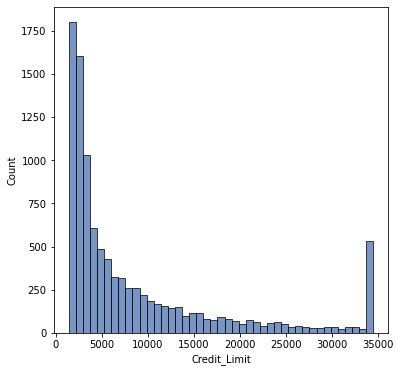

In [724]:
# Credit_Limit의 분포를 히스토그램으로 시각화
sns.histplot(df["Credit_Limit"])

In [725]:
# 편향이 심한 Credit_Limit은 로그 변환을 해주도록한다.

df["Credit_Limit"]=np.log1p(df["Credit_Limit"])

In [726]:
df["Credit_Limit"]

0        9.448727
1        9.018817
2        8.137103
3        8.105911
4        8.458928
           ...   
10122    8.295049
10123    8.361241
10124    8.596004
10125    8.572060
10126    9.248503
Name: Credit_Limit, Length: 10127, dtype: float64

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

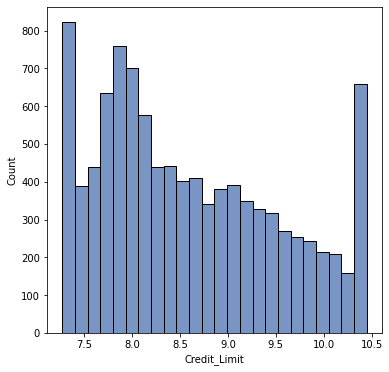

In [727]:
sns.histplot(df["Credit_Limit"])
# 편향이 조금 완화 된것을 확인 할 수 있다.

**수치형 변수 표준 정규화**
- 단위가 다른 수치형 변수들이 평균 0, 표준편차 1 을 따르도록 변환

In [728]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for numeric in ['Customer_Age','Credit_Limit','Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1','Total_Trans_Ct']:
    df[numeric] = scaler.fit_transform(df[numeric].values.reshape(-1,1))

In [729]:
# 수치형 데이터 표준화 확인
df[Numerics].head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct
0,-0.165406,3.0,39.0,5.0,1.0,3.0,0.905210,-0.473422,3.834003,-0.973895
1,0.333570,5.0,44.0,6.0,1.0,2.0,0.444695,-0.366667,12.608573,-1.357340
2,0.583058,3.0,36.0,4.0,1.0,0.0,-0.499786,-1.426858,6.807864,-1.911206
3,-0.789126,4.0,34.0,3.0,4.0,1.0,-0.533199,1.661686,6.807864,-1.911206
4,-0.789126,3.0,21.0,5.0,1.0,0.0,-0.155051,-1.426858,7.509325,-1.570365


### 전처리 완료한 데이터프레임 저장 

In [730]:
df.to_csv('./data/BankChurners(preprocessed).csv',sep=',',index=False) 

### 피처엔지니어링 함수화

In [732]:
# Unknown을 결측치로 처리 함수
def Unknown_to_nan(df):
    df.replace({"Unknown": np.nan},inplace=True) # 데이터 전체에 존재하는 "Unknown"을 결측치로 처리
    return df

# 레이블 인코딩 수행 함수
def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    features=['Education_Level','Income_Category','Card_Category','Marital_Status','Gender']
    for feature in features:
            le = LabelEncoder()
            le = le.fit(df[feature])
            df[feature] = le.transform(df[feature])
    return df

# # Unknown도 무응답으로 인지 후 더미화 
# def format_features(df):
#     features=['Education_Level','Income_Category','Card_Category','Marital_Status','Gender']
#     for feature in features:
#         feature_OH =  pd.get_dummies(df[feature])
#         df = pd.concat([df, feature_OH], axis=1)
#         df.drop(feature,axis=1,inplace=True)
#     return df

# 결측치를 대표값으로 대체하는 함수
def fill(df):
    # 대표값 이용 결측치 대체 모듈 
    from sklearn.impute import SimpleImputer
    # 각 데이터에 사용할 인스턴스 생성
    SI_mode =SimpleImputer(strategy = 'most_frequent') # 대표값 중 최빈값으로 결측치를 대체해준다.
    # 학습
    SI_mode.fit(df)
    df = pd.DataFrame(SI_mode.transform(df),
                            columns = df.columns)
    return df
    
# 데이타 타입을 수치형으로 바꿔주는 함수
def toNumerics(df):
    df[Numerics]=df[Numerics].astype("float")
    df[Labels]=df[Labels].astype("int")
    df[Orders]=df[Orders].astype("int")
    df["Attrition_Flag"]=df["Attrition_Flag"].astype("int")
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(["CLIENTNUM", # 식별자 삭제
         "Avg_Open_To_Buy",
         "Avg_Utilization_Ratio",
         "Total_Trans_Amt",
         "Total_Amt_Chng_Q4_Q1"], axis=1,inplace=True)
    return df

# 로그변환 함수
def log_transformation(df):
   df["Credit_Limit"]=np.log1p(df["Credit_Limit"])
   return df

# 수치형 변수 표준화 스케일링
def Standared_scaling(df):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    for numeric in ['Customer_Age','Credit_Limit','Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1','Total_Trans_Ct']:
        df[numeric] = scaler.fit_transform(df[numeric].values.reshape(-1,1))
    return df
    

# 전처리 함수 호출
def transform_features(df):
    #df = Unknown_to_nan(df)
    df = format_features(df)
    df = fill(df)
    df = toNumerics(df)
    df = drop_features(df)
    df = log_transformation(df)
    df = Standared_scaling(df)
    return df
    

In [733]:
df=transform_features(df)

In [734]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,0,-0.165406,1,3.0,3,1,2,0,39.0,5.0,1.0,3.0,0.905210,-0.473422,-0.973895,3.834003
1,0,0.333570,0,5.0,2,2,4,0,44.0,6.0,1.0,2.0,0.444695,-0.366667,-1.357340,12.608573
2,0,0.583058,1,3.0,2,1,3,0,36.0,4.0,1.0,0.0,-0.499786,-1.426858,-1.911206,6.807864
3,0,-0.789126,0,4.0,3,3,4,0,34.0,3.0,4.0,1.0,-0.533199,1.661686,-1.911206,6.807864
4,0,-0.789126,1,3.0,5,1,2,0,21.0,5.0,1.0,0.0,-0.155051,-1.426858,-1.570365,7.509325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,0.458314,1,2.0,2,2,1,0,40.0,3.0,2.0,3.0,-0.330596,0.844455,2.221481,0.608119
10123,1,-0.664382,1,2.0,6,0,1,0,25.0,4.0,2.0,3.0,-0.259693,1.255524,0.176440,-0.122745
10124,1,-0.290150,0,1.0,3,1,4,0,36.0,5.0,3.0,4.0,-0.008217,-1.426858,-0.207005,0.444305
10125,1,-2.036565,1,2.0,2,3,1,0,36.0,4.0,3.0,3.0,-0.033865,-1.426858,-0.121795,0.041070


## 5. 모델링

### 안성준 표작성 부탁
- 결과치 표

### 5 - (1)지도학습

In [735]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    
#     # ROC-AUC 추가 
#     roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
#     # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
     F1: {3:.4f}'.format(accuracy, precision, recall, f1)) #, roc_auc))

#### 사용할 알고리즘
-
- LogisticRegression
- XGBoost
- LightGBM

In [736]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.05,0.11,0.2,0.3, 0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

In [737]:
# 함수 만들기
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

# y_test : 실제 값  pred_proba_c1: 예측 확률 값
def precision_recall_curve_plot(y_test , pred_proba_c1): 
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0] # (143,)에서 143 추출
    # thresholds : 143이고, precisions과 recalls는 144개로 x, y축 값의 개수가 맞지 않으므로
    # precisions, recalls로 그래프 그리면 오류 
    # y 값을 [0:threshold_boundary] ([0:143])로 143개 추출해서 x축 개수와 맞춤
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision') 
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    # xlim() : X축 범위를 지정하거나 반환
    start, end = plt.xlim() # X축 범위 반환
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

### 사용 함수

In [738]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None) :
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test,pred,pred_proba) ## 평가진행 함수 호출

### 학습/평가 데이터 분리

In [739]:
X = df.iloc[:,1:] # 피처 변수 
y = df.iloc[:,:1] # 타겟 변수 분리 

In [740]:
# 학습 데이터와 평가 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### 사용자 알고리즘 명

- LogisticRegression
- XGBoost
- LightGBM


## 기본 모델링

In [741]:
from sklearn.tree import DecisionTreeClassifier # 의사결정 나무
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀
from sklearn.neighbors import KNeighborsClassifier # k-최근접이웃
from sklearn.ensemble import GradientBoostingClassifier # GBM
from xgboost import XGBClassifier # XGBM
from lightgbm import LGBMClassifier # LightGBM
from sklearn import svm


# 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()
kn_clf = KNeighborsClassifier(n_neighbors=5)
gb_clf = GradientBoostingClassifier(random_state=11)
lgbm_clf = LGBMClassifier(random_state=11)
svm_clf = svm.SVC(probability=True)

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, dt_pred, dt_pred_proba)

# RandomForestClassifier
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, rf_pred, rf_pred_proba)

# LogistRegression
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, lr_pred, lr_pred_proba)

# KNeighborsClassifier
kn_clf.fit(X_train, y_train)
kn_pred = kn_clf.predict(X_test)
kn_pred_proba = kn_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, kn_pred, kn_pred_proba)

# GBM
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_pred_proba = gb_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, gb_pred, gb_pred_proba)

# LightGBM
lgbm_clf.fit(X_train,y_train)
lgbm_pred = lgbm_clf.predict(X_test)
lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, lgbm_pred, lgbm_pred_proba)

# XGBM
xgb_wrapper = XGBClassifier()
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, w_preds, w_pred_proba)


# SVM
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_pred_proba = svm_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, svm_pred, svm_pred_proba)

# 시간이 조금 걸림

DecisionTreeClassifier(random_state=11)

오차 행렬
[[1982  143]
 [ 136  271]]
정확도: 0.8898, 정밀도: 0.6546, 재현율: 0.6658,     F1: 0.6602


RandomForestClassifier(random_state=11)

오차 행렬
[[2083   42]
 [ 159  248]]
정확도: 0.9206, 정밀도: 0.8552, 재현율: 0.6093,     F1: 0.7116


LogisticRegression()

오차 행렬
[[2065   60]
 [ 205  202]]
정확도: 0.8953, 정밀도: 0.7710, 재현율: 0.4963,     F1: 0.6039


KNeighborsClassifier()

오차 행렬
[[2091   34]
 [ 253  154]]
정확도: 0.8867, 정밀도: 0.8191, 재현율: 0.3784,     F1: 0.5176


GradientBoostingClassifier(random_state=11)

오차 행렬
[[2072   53]
 [ 143  264]]
정확도: 0.9226, 정밀도: 0.8328, 재현율: 0.6486,     F1: 0.7293


LGBMClassifier(random_state=11)

오차 행렬
[[2073   52]
 [ 119  288]]
정확도: 0.9325, 정밀도: 0.8471, 재현율: 0.7076,     F1: 0.7711
[12:02:30] WARNING: /Users/ktietz/demo/mc3/conda-bld/xgboost-split_1628682908089/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

오차 행렬
[[2068   57]
 [ 127  280]]
정확도: 0.9273, 정밀도: 0.8309, 재현율: 0.6880,     F1: 0.7527


SVC(probability=True)

오차 행렬
[[2103   22]
 [ 260  147]]
정확도: 0.8886, 정밀도: 0.8698, 재현율: 0.3612,     F1: 0.5104


## Smote (업샘플링)

In [742]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=11)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트', X_train.shape, y_train.shape)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트', X_train_over.shape, y_train_over.shape)

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 (7595, 15) (7595, 1)
SMOTE 적용 전 학습용 피처/레이블 데이터 세트 (12750, 15) (12750, 1)


In [743]:
X_train = X_train_over
y_train = y_train_over

In [744]:
# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, dt_pred, dt_pred_proba)

# RandomForestClassifier
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, rf_pred, rf_pred_proba)

# LogistRegression
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, lr_pred, lr_pred_proba)

# KNeighborsClassifier
kn_clf.fit(X_train, y_train)
kn_pred = kn_clf.predict(X_test)
kn_pred_proba = kn_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, kn_pred, kn_pred_proba)

# # GBM
# gb_clf.fit(X_train, y_train)
# gb_pred = gb_clf.predict(X_test)
# gb_pred_proba = gb_clf.predict_proba(X_test)[:,1]
# get_clf_eval(y_test, gb_pred, gb_pred_proba)


# LightGBM
lgbm_clf.fit(X_train,y_train)
lgbm_pred = lgbm_clf.predict(X_test)
lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, lgbm_pred, lgbm_pred_proba)


# XGBM
xgb_wrapper = XGBClassifier()
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, w_preds, w_pred_proba)

# SVM
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_pred_proba = svm_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, svm_pred, svm_pred_proba)

DecisionTreeClassifier(random_state=11)

오차 행렬
[[1939  186]
 [ 125  282]]
정확도: 0.8772, 정밀도: 0.6026, 재현율: 0.6929,     F1: 0.6446


RandomForestClassifier(random_state=11)

오차 행렬
[[2052   73]
 [ 118  289]]
정확도: 0.9246, 정밀도: 0.7983, 재현율: 0.7101,     F1: 0.7516


LogisticRegression()

오차 행렬
[[1813  312]
 [ 106  301]]
정확도: 0.8349, 정밀도: 0.4910, 재현율: 0.7396,     F1: 0.5902


KNeighborsClassifier()

오차 행렬
[[1722  403]
 [  95  312]]
정확도: 0.8033, 정밀도: 0.4364, 재현율: 0.7666,     F1: 0.5561


LGBMClassifier(random_state=11)

오차 행렬
[[2054   71]
 [ 110  297]]
정확도: 0.9285, 정밀도: 0.8071, 재현율: 0.7297,     F1: 0.7665
[12:02:36] WARNING: /Users/ktietz/demo/mc3/conda-bld/xgboost-split_1628682908089/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

오차 행렬
[[2047   78]
 [ 115  292]]
정확도: 0.9238, 정밀도: 0.7892, 재현율: 0.7174,     F1: 0.7516


SVC(probability=True)

오차 행렬
[[1836  289]
 [  99  308]]
정확도: 0.8468, 정밀도: 0.5159, 재현율: 0.7568,     F1: 0.6135


In [745]:
--

SyntaxError: invalid syntax (3659366440.py, line 1)

## 앙상블 학습 결과

(DecisionTree, LogisticRegression, KNeighborsClassifier)

소프트 보팅 결과

In [ ]:
from sklearn.ensemble import VotingClassifier

vo_clf = VotingClassifier( estimators=[('rf',rf_clf),('xgb',xgb_wrapper)],voting='soft')
vo_clf.fit(X_train_over,y_train_over)
vo_pred = vo_clf.predict(X_test)
vo_pred_proba = vo_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, vo_pred, vo_pred_proba)



In [ ]:
pred_proba = vo_clf.predict_proba(X_test)

In [ ]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.2,0.31,0.32,0.33,0.34,0.36,0.37, 0.4, 0.45, 0.50, 0.55, 0.60]

In [ ]:
from sklearn.preprocessing import Binarizer

get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

In [ ]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = pred_proba[:, 1] 
font = {
        'color': 'white',
        'size' : 16
         }






# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)


precision_recall_curve_plot(y_test,pred_proba[:, 1]   )






## 하이퍼 파라미터 

### Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[6,8,10,12,16,20,24],

    'min_samples_split':[2,4,6,8,16,32,64],
    
    'max_leaf_nodes':[2,4,6,8,16,32,64]

}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='recall', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
# print('GridSearchCV 최고 평균 재현율 수치 : {0:.4f}'.format(grid_cv.best_score_))
# print('GridSearchCV 최적 하이퍼 파라미터 :',grid_cv.best_params_)

In [ ]:
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)
pred_proba1 = best_dt_clf.predict_proba(X_test)[:,1]
dt_results = get_clf_eval(y_test, pred1, pred_proba1)

### RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[6,8,10,12,16,20,24],

#     'min_samples_split':[2,4,6,8,16,32,64],
    
#     'max_leaf_nodes':[2,4,6,8,16,32,64]
}

grid_cv = GridSearchCV(rf_clf, param_grid=params, scoring='recall', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 재현율 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 :',grid_cv.best_params_)

In [ ]:
best_rf_clf = grid_cv.best_estimator_
pred1 = best_rf_clf.predict(X_test)
pred_proba1 = best_rf_clf.predict_proba(X_test)[:,1]
dt_results = get_clf_eval(y_test, pred1, pred_proba1)

### LoigisticRegression


LogisticRegression은 MaxDepth 파라미터가 존재하지 않음.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'penalty':['l1','l2','elasticnet','none'],
    'C':[1,2,3,4]
}

grid_cv = GridSearchCV(lr_clf, param_grid=params, scoring='recall', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 재현율 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 :',grid_cv.best_params_)

In [ ]:
best_lr_clf = grid_cv.best_estimator_
pred1 = best_lr_clf.predict(X_test)
pred_proba1 = best_lr_clf.predict_proba(X_test)[:,1]
dt_results = get_clf_eval(y_test, pred1, pred_proba1)

### KNeightborsClassifier




KNeighborsClassifer는 MaxDepth Parameter가 존재하지 않음.

In [ ]:
# from sklearn.model_selection import GridSearchCV

# params = {
#     'algorithm':['auto','ball_tree','kd_tree','brute'],
#     'p':[2,4,6,8,10,12],
#     'weights':['uniform','distance']
    
    
# }

# grid_cv = GridSearchCV(kn_clf, param_grid=params, scoring='recall', cv=5, verbose=1)
# grid_cv.fit(X_train, y_train)
# print('GridSearchCV 최고 평균 재현율 수치 : {0:.4f}'.format(grid_cv.best_score_))
# print('GridSearchCV 최적 하이퍼 파라미터 :',grid_cv.best_params_)

In [ ]:
# best_kn_clf = grid_cv.best_estimator_
# pred1 = best_kn_clf.predict(X_test)
# pred_proba1 = best_kn_clf.predict_proba(X_test)[:,1]
# dt_results = get_clf_eval(y_test, pred1, pred_proba1)

### GBM

In [ ]:
# from sklearn.model_selection import GridSearchCV

# params = {
#     'min_samples_leaf':[2,4,8,16,32,64],
#     'max_depth':[6,8,10,12,16,20,24],
#     'max_features':[1,2,3,4,5,6,7,8,9,10]
# }

# grid_cv = GridSearchCV(gb_clf, param_grid=params, scoring='recall', cv=5, verbose=1)
# grid_cv.fit(X_train, y_train)
# print('GridSearchCV 최고 평균 재현율 수치 : {0:.4f}'.format(grid_cv.best_score_))
# print('GridSearchCV 최적 하이퍼 파라미터 :',grid_cv.best_params_)

In [ ]:
# best_gb_clf = grid_cv.best_estimator_
# pred1 = best_gb_clf.predict(X_test)
# pred_proba1 = best_gb_clf.predict_proba(X_test)[:,1]
# dt_results = get_clf_eval(y_test, pred1, pred_proba1)

## LIghtGBM

https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    
    #'min_gain_to_split':[0,1,2,3,4,8,10,12,20],
    'max_depth':[6,8,10,12,16,20,24],
    'num_leaves':[5,10,15,20,25,30,31,35,40,41]
}

grid_cv = GridSearchCV(lgbm_clf, param_grid=params, scoring='recall', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 재현율 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 :',grid_cv.best_params_)

In [ ]:
best_lgbm_clf = grid_cv.best_estimator_
pred1 = best_lgbm_clf.predict(X_test)
pred_proba1 = best_lgbm_clf.predict_proba(X_test)[:,1]
dt_results = get_clf_eval(y_test, pred1, pred_proba1)

### XGBM


https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[3,4,5,6,7,8,9,10],
    'max_leaf_nodes':[2,4,8,16,32,64],
    #'subsample':[0.5,0.6,0.7,0.8,0.9,1,1.1]
}

grid_cv = GridSearchCV(xgb_wrapper, param_grid=params, scoring='recall', cv=5, verbose=0)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 재현율 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 :',grid_cv.best_params_)

In [ ]:
best_xgb_wrapper = grid_cv.best_estimator_
pred1 = best_xgb_wrapper.predict(X_test)
pred_proba1 = best_xgb_wrapper.predict_proba(X_test)[:,1]
dt_results = get_clf_eval(y_test, pred1, pred_proba1)

# Trade-OFF

### LGBM

In [ ]:
pred_proba = best_lgbm_clf.predict_proba(X_test)

In [ ]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.31,0.32,0.34,0.33,0.37, 0.4, 0.45, 0.50, 0.55, 0.60]

In [ ]:
from sklearn.preprocessing import Binarizer

get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

In [ ]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = pred_proba[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)

In [ ]:
precision_recall_curve_plot(y_test,pred_proba[:, 1]   )

## XGBClassifier 함수

In [ ]:


pred_proba = best_xgb_wrapper.predict_proba(X_test)
pred_proba[:10]


In [ ]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.2,0.31,0.32,0.33,0.34,0.36,0.37, 0.4, 0.45, 0.50, 0.55, 0.60]

In [ ]:
from sklearn.preprocessing import Binarizer

get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

In [ ]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = pred_proba[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)

In [ ]:

precision_recall_curve_plot(y_test,pred_proba[:, 1]   )